# Árvores de regressão - exercício 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

Obs: Notem que o Dataset Boston Housing foi removido do scikit-learn devido à restrições éticas onde a coluna 'B' representa a proporção de negros por cidade.
Como alternativa foi sugerido o download do arquivo da fonte original por URL com o seguinte código:


In [6]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

# URL for the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Fetching the data from the URL
response = requests.get(data_url)
data_text = response.text

# Parsing the relevant part of the text data
parsed_data = StringIO("\n".join(data_text.split("\n")[22:506]))

# Loading the data into a DataFrame
raw_df = pd.read_csv(parsed_data, sep="\s+", header=None)

# Reshaping the data into the correct format
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Creating the feature names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Creating the DataFrames for features and target
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['MEDV'])

# Remoção da coluna com viés e avaliação ética negativa
X = X.drop(columns=['B'])

X.head(), y.head()



(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO  LSTAT  
 0     15.3   4.98  
 1     17.8   9.14  
 2     17.8   4.03  
 3     18.7   2.94  
 4     18.7   5.33  ,
    MEDV
 0  24.0
 1  21.6
 2  34.7
 3  33.4
 4  36.2)

Notem que a coluna B foi excluída, dado que a mesma representa um viés com problemáticas éticas.

1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
#Verificando valores ausentes
missing_values = X.isnull().sum().sum() + y.isnull().sum().sum()
missing_values

0

In [8]:
#Verificando o formato dos dados
data_types = X.dtypes
data_types


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
dtype: object

In [9]:
Y_type = y.dtypes
Y_type

MEDV    float64
dtype: object

In [10]:
#Notamos que em nossos Dfs não possuímos valores ausantes e todos os formatos dos dados são do tipo float64 

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [11]:
#combinando os DFs em um único
concact_dfs = pd.concat([X, y], axis =1)

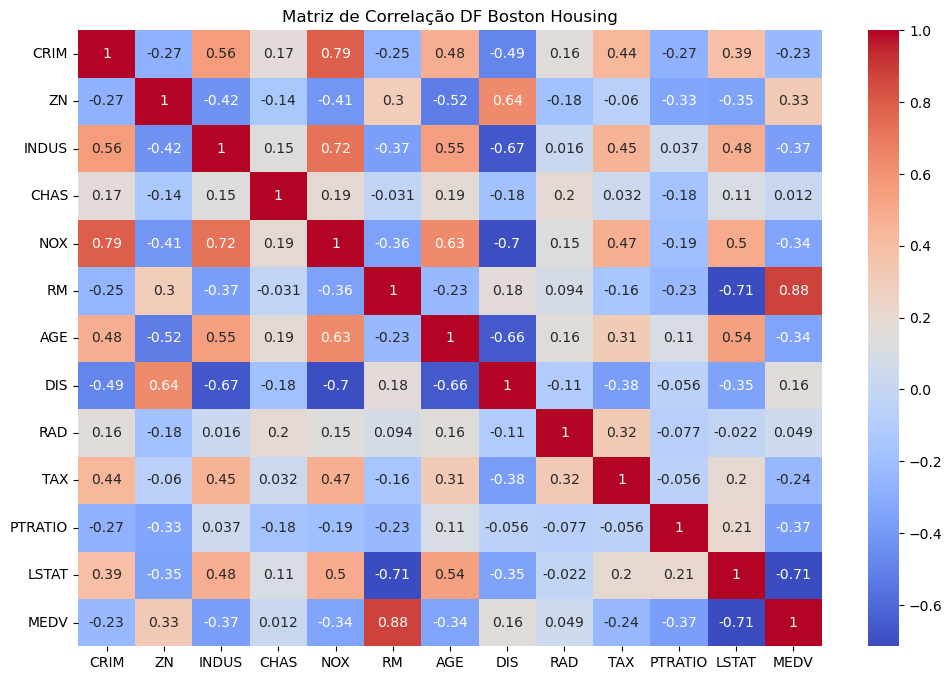

In [12]:
#Criando a matrix de correlação
corr_matrix = concact_dfs.corr()


#Plotando o heatmap com seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação DF Boston Housing")
plt.show()


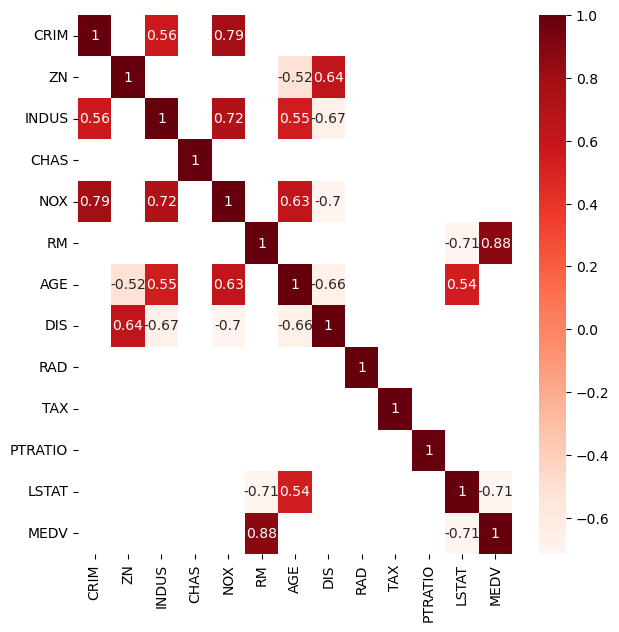

In [13]:
#Embora a correlação possa ser examinada visualmente, optei por utilizar a abordagem abaixo:

high_corr = corr_matrix[(corr_matrix.abs() >= 0.5)]
plt.figure(figsize=(7,7 ))
sns.heatmap(high_corr, annot=True, cmap='Reds')
plt.show()


A abordagem acima apresentou as variáveis mais correlacionadas tanto positiva quanto negativamente.
Embora os modelos de Árvores de Regressão costumam performar bem mesmo com o uso de todas as variáveis numéricas disponíveis. Acredito que um teste extra com as a variáveis mais correlacionadas (e a comparação dos respectivos resultados) possam apresentar bons resultados.

### 3. Separe os dados em validação e teste

No início do notebook já havíamos dividido as variáveis entre X e y.
Porém, no DF criado para a Matriz de Correlação, concatemos os dois conjuntos de dados, utilizarei o concact_dfs e o renomearei para 'data' a título de comprrensividade do notebook.
Notem que a coluna target 'MEDV' se manteve no novo DF e será separada para validação e teste em seguida:

In [14]:
data = concact_dfs.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [15]:
#Dividindo o conjunto para trteino e teste
from sklearn.model_selection import train_test_split

X = data.drop("MEDV", axis=1) #drop é função () de exclusão da coluna
y = data['MEDV'] #utiliza-se[] para agregação da coluna

#Dividindo os dados em conjuntos de treino e teste
# Mantendo 70% dos dados para treino e 30% para teste
# O parâmetro 'random_state' garante a reprodutibilidade (seed 42 opção)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Separando o conjunto (da base teste) com 10% dos dados para avaliação:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.143, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [20]:
#Com profundidade máxima = 8
regressor_depth_8 = DecisionTreeRegressor(max_depth=8)
#Treinando o modelo
regressor_depth_8.fit(X_train, y_train)

#Com profundidade máxima = 2
regressor_depth_2 = DecisionTreeRegressor(max_depth=2)
#Treinando o modelo
regressor_depth_2.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [22]:
from sklearn.metrics import mean_squared_error

#fazendo previsões para cada árvore
train_predictions_depth_8 = regressor_depth_8.predict(X_train)
test_predictions_depth_8 = regressor_depth_8.predict(X_test)

train_predictions_depth_2 = regressor_depth_2.predict(X_train)
test_predictions_depth_2 = regressor_depth_2.predict(X_test)

# Calculando MSE para árvore com profundidade máxima = 8
mse_train_depth_8 = mean_squared_error(y_train, train_predictions_depth_8)
mse_test_depth_8 = mean_squared_error(y_test, test_predictions_depth_8)

# Calculando MSE para árvore com profundidade máxima = 2
mse_train_depth_2 = mean_squared_error(y_train, train_predictions_depth_2)
mse_test_depth_2 = mean_squared_error(y_test, test_predictions_depth_2)

#Resultados
print(f" Árvore de regressão com profundidade = 8: MSE Treinamento = {mse_train_depth_8}, MSE teste = {mse_test_depth_8}")
print(f" Árvore de regressão com profundidade = 2: MSE Treinamento = {mse_train_depth_2}, MSE teste = {mse_test_depth_2}")




 Árvore de regressão com profundidade = 8: MSE Treinamento = 0.5647615740740739, MSE teste = 15.706630593607308
 Árvore de regressão com profundidade = 2: MSE Treinamento = 12.515714256556047, MSE teste = 16.107329356307677


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Interpretando os resultados:

Árvore com Profundidade 8:
MSE de Treinamento: Muito baixo (0.5647615740740739), indicando que o modelo se ajustou muito bem aos dados de treino.
MSE de Teste: Bastante alto (15.530987519025876), mostrando que o modelo não generalizou bem para os dados de teste.

Interpretação: Esta árvore sofre de sobreajuste. Ela aprendeu tão bem os detalhes específicos dos dados de treino que não consegue prever corretamente os novos dados. É muito específica para os dados de treino e, portanto, pode não ser confiável para prever dados desconhecidos.

Árvore com Profundidade 2
MSE de Treinamento: Moderadamente alto (12.515714256556047), sugerindo que o modelo não aprendeu os dados de treino tão detalhadamente.
MSE de Teste: Similarmente alto, mas não muito diferente do MSE de treinamento (16.10732935630767).

Interpretação: Esta árvore tem um desempenho mais consistente entre treino e teste, o que sugere que ela não está sobreajustada. No entanto, o desempenho geral não é tão bom, indicando que o modelo pode ser muito simplista e não captura a complexidade dos dados (subajuste).

Conclusão: 

A árvore com profundidade 2 é mais balanceada em termos de evitar o sobreajuste, mas pode não ser suficientemente precisa.
A árvore com profundidade 8, apesar de precisão no treino, pode falhar na previsão de novos dados devido ao sobreajuste.

Escolha Mais Adequada: Se tivermos que escolher entre as duas, a árvore com profundidade 2 parece mais adequada devido à sua capacidade de generalização, apesar de sua precisão não ser ideal. No entanto, uma abordagem melhor seria tentar outros modelos ou ajustar a profundidade e outros hiperparâmetros para encontrar um equilíbrio melhor entre precisão e generalização.

Possível solução:
Experimentar com profundidades intermediárias e usar técnicas como validação cruzada ou ajuste de hiperparâmetros podem ajudar a encontrar um modelo mais otimizado.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

 Conforme observamos acima, mesmo que não tenhamos obtido um bom resultado em nossos modelos, a árvore com produndidade 2 parece mais mais aceitável, portanto, escolhemos essa ávore para a plotagem de sua visualização gráfica: 

A importância das variáveis é determinada pela posição na árvore: variáveis no topo (mais próximas da raiz) são geralmente consideradas mais importantes, pois influenciam mais decisões.

É igualmente importante lembrarmos que para a visualização de árvores de decisões (regressão no nosso caso), costumamos utilizar a biblioteca matplotlib junto com a função do scikit-learm - plot_tree - a qual é parte do módulo tree da mesma biblioteca;

In [24]:
#Importando a função plot_tree da biblioteca sklearn
from sklearn.tree import DecisionTreeRegressor, plot_tree

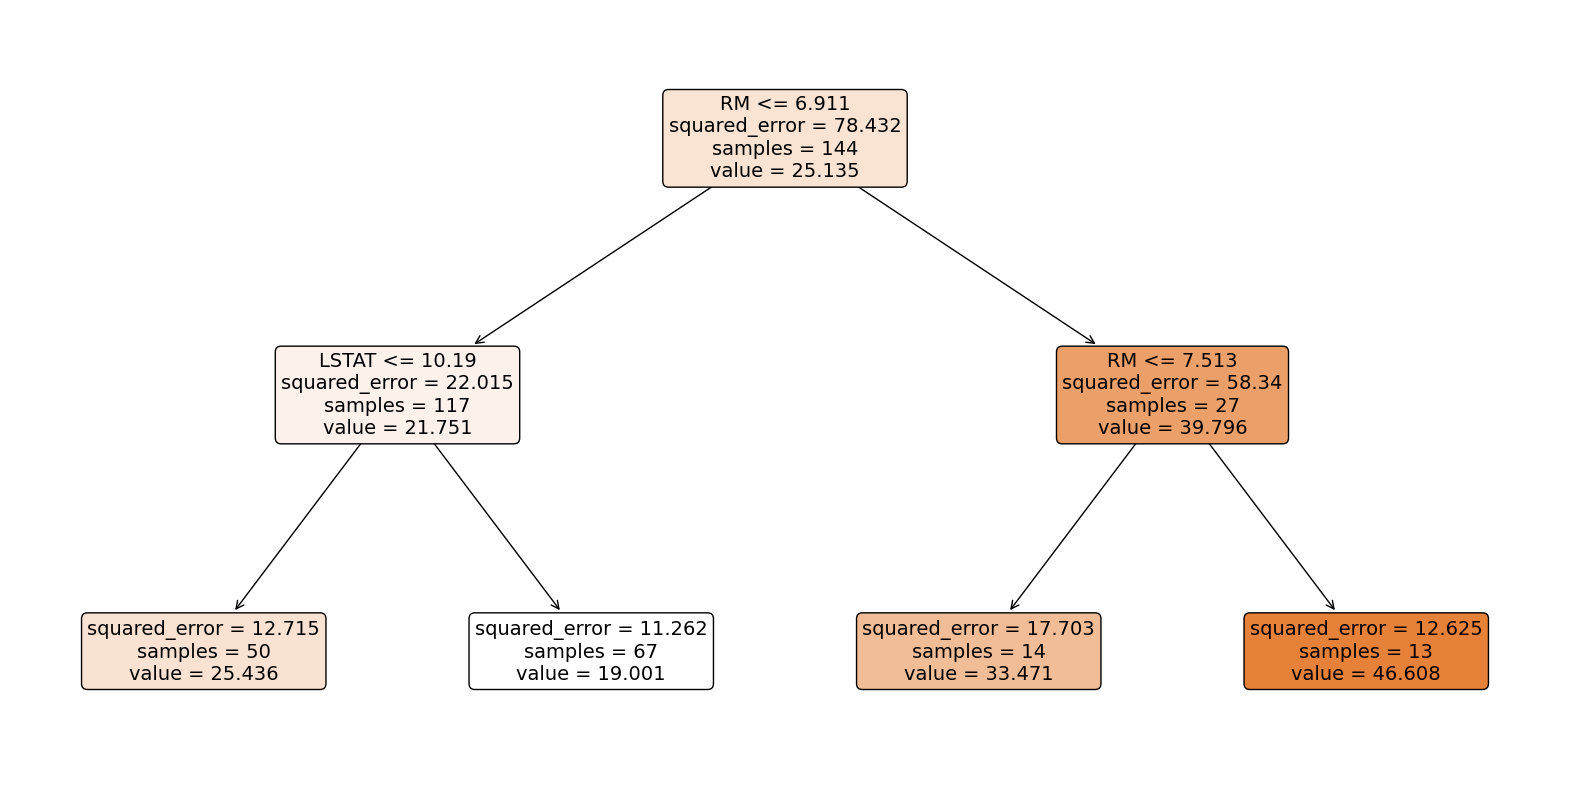

In [26]:
#Plotando a árvore
plt.figure(figsize=(20,10)) #definindo a figura e seu tamanho
a = plot_tree(regressor_depth_2, 
              feature_names=X_train.columns, 
              class_names=y_train, 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.show()

Conclusão: 
Conforme mencionamos acima, geralmente a variável no topo da árvore é a mais importante para o modelo. Podemos concluir que a variável RM (número médio de quartos por habitação) parece ser a mais relevante para este caso. Ela é a primeira a ser usada para dividir os dados, indicando que tem um grande impacto na previsão da variável alvo.